# Introduction to Pandas

This tutorial is partially based on the ["Solving real world data science tasks with Python Pandas!"](https://github.com/KeithGalli/Pandas-Data-Science-Tasks) tutorial, by Keith Galli.

The [Sales dataset](https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data) used in this tutorial comes from the aforementioned Keith's tutorial.

## Import necessary libraries

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

## Load and explore sales data for one month 

### Load sales data from a csv file

The data is stored in the 'sales_data' subdirectory, within the 'data' directory. 

In [103]:
DATA_DIR = "data/sales_data"

Load the data from the 'Sales_January_2019' csv file, from the 'sales_data' directory 

In [104]:
jan_sales = pd.read_csv(Path.cwd() / DATA_DIR / 'Sales_January_2019.csv')

### Explore the loaded 

Let's first see what the data looks like

In [105]:
jan_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


First, get the size of the dataframe, that is, the number of rows and columns

In [106]:
jan_sales.shape

(9723, 6)

Access the columns' names

In [107]:
jan_sales.columns.to_list()

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

Examine the columns' data types

In [108]:
jan_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

A nice overview of pandas' data types can be found, for example, in [this article](https://pbpython.com/pandas_dtypes.html).

Get a complete set of information about the data frame

In [109]:
jan_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


### Examine the missing values

To do that, we'll use the `isna()` method

In [110]:
jan_sales.isna().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

#### Remove rows with all missing values

This can be done with the `dropna()` method

In [111]:
jan_sales.dropna(how='all', inplace=True)

In [112]:
jan_sales.isna().sum().sum()

0

### Subset the data frame or select particular rows / columns

This can be done in different ways; the recommended practice is to use Dataframe methods `loc` or `iloc`.

When doing the selection based on the ordinal number of rows and columns, `iloc` should be used.

When the selection is to be based on a condition to be evaluated against rows and / or columns are to be selected based on their names, `loc` should be used. 

**Example 1**: select first 3 columns and first 6 rows

In [113]:
jan_sales.iloc[:6, :3]

,Order ID,Product,Quantity Ordered
0,141234,iPhone,1
1,141235,Lightning Charging Cable,1
2,141236,Wired Headphones,2
3,141237,27in FHD Monitor,1
4,141238,Wired Headphones,1
5,141239,AAA Batteries (4-pack),1


**Example 2**: select the last 5 rows and 1st, 2nd and 5th column

In [114]:
jan_sales.iloc[-5:, [0,1,4]]

,Order ID,Product,Order Date
9718,150497,20in Monitor,01/26/19 19:09
9719,150498,27in FHD Monitor,01/10/19 22:58
9720,150499,ThinkPad Laptop,01/21/19 14:31
9721,150500,AAA Batteries (4-pack),01/15/19 14:21
9722,150501,Google Phone,01/13/19 16:43


**Example 3**: Select Order ID, Order Date, and Purchase Address for orders coming from Boston

Note: we can use `str` to get the string value of a pandas Series (the 'Purchase Address' column, in this case), so that we can call any string method on it.

In [115]:
jan_sales.loc[jan_sales['Purchase Address'].str.contains('Boston'), ['Order ID', 'Order Date', 'Purchase Address']]

,Order ID,Order Date,Purchase Address
0,141234,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
17,141251,01/24/19 08:13,"414 Walnut St, Boston, MA 02215"
29,141263,01/11/19 23:33,"640 Spruce St, Boston, MA 02215"
31,141265,01/01/19 16:52,"853 Ridge St, Boston, MA 02215"
37,141271,01/30/19 10:51,"90 13th St, Boston, MA 02215"
...,...,...,...
9627,150409,01/10/19 02:38,"410 Forest St, Boston, MA 02215"
9660,150440,01/10/19 19:19,"82 Johnson St, Boston, MA 02215"
9666,150445,01/11/19 13:56,"147 Lincoln St, Boston, MA 02215"
9694,150473,01/10/19 09:09,"148 Hickory St, Boston, MA 02215"


**Example 4**: Select Order ID, Product and Price Each for orders where the ordered quantity is at least 3

Note that even though the Quantity Ordered column stores numeric information, its values are encoded as strings: 

In [116]:
type(jan_sales['Quantity Ordered'][0])

str

So, we first need to transform the Quantity Ordered column to numeric type. <br>To that end, we use `pd.to_numeric()` function:

In [117]:
jan_sales['Quantity Ordered'] = pd.to_numeric(jan_sales['Quantity Ordered'], errors='coerce')

Now, we can do the intended selection:

In [118]:
jan_sales.loc[jan_sales['Quantity Ordered'] >= 3, ['Order ID', 'Price Each', 'Product']]

,Order ID,Price Each,Product
12,141246,2.99,AAA Batteries (4-pack)
52,141285,2.99,AAA Batteries (4-pack)
58,141290,3.84,AA Batteries (4-pack)
73,141305,2.99,AAA Batteries (4-pack)
84,141316,2.99,AAA Batteries (4-pack)
...,...,...,...
9513,150299,3.84,AA Batteries (4-pack)
9590,150372,2.99,AAA Batteries (4-pack)
9636,150417,11.99,Wired Headphones
9659,150439,11.99,Wired Headphones


## Load sales data for all months in 2019 and merge them into one data set

We need to load the sales data from all csv files (one for each month) available in the 'sales_data' directory. 

Let's first see how to take only .csv files from a given directory:

In [119]:
def get_csv_files(fpath):
    csv_files = []
    if not fpath.is_dir():
        print("Error! Not a directory! Cannot proceed")
        return
    for f in fpath.iterdir():
        if f.is_dir(): continue
        if f.suffix == ".csv":
            csv_files.append(f)
    return csv_files

In [120]:
get_csv_files(Path.cwd() / DATA_DIR)

[PosixPath('/Users/jelena.jovanovic/Teaching/Teaching@FON/Osnovne studije/P3 (Python)/P3_Labs_2023/pandas/data/sales_data/Sales_December_2019.csv'),
 PosixPath('/Users/jelena.jovanovic/Teaching/Teaching@FON/Osnovne studije/P3 (Python)/P3_Labs_2023/pandas/data/sales_data/Sales_April_2019.csv'),
 PosixPath('/Users/jelena.jovanovic/Teaching/Teaching@FON/Osnovne studije/P3 (Python)/P3_Labs_2023/pandas/data/sales_data/Sales_February_2019.csv'),
 PosixPath('/Users/jelena.jovanovic/Teaching/Teaching@FON/Osnovne studije/P3 (Python)/P3_Labs_2023/pandas/data/sales_data/Sales_March_2019.csv'),
 PosixPath('/Users/jelena.jovanovic/Teaching/Teaching@FON/Osnovne studije/P3 (Python)/P3_Labs_2023/pandas/data/sales_data/all_sales_2019.csv'),
 PosixPath('/Users/jelena.jovanovic/Teaching/Teaching@FON/Osnovne studije/P3 (Python)/P3_Labs_2023/pandas/data/sales_data/Sales_August_2019.csv'),
 PosixPath('/Users/jelena.jovanovic/Teaching/Teaching@FON/Osnovne studije/P3 (Python)/P3_Labs_2023/pandas/data/sales_da

We'll now take each csv file in turn, load the data from it and add the loaded data into a common DataFrame that stores sales data for the whole year.

To merge two DataFrames, we'll use `pd.concat` function

In [121]:
pd.concat?

In [122]:
all_sales = pd.DataFrame()

for sales_file in get_csv_files(Path.cwd() / DATA_DIR):
    sales_data = pd.read_csv(sales_file)
    all_sales = pd.concat([all_sales, sales_data])

all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Quantity_Ordered,Price_Each,Order_Date,Purchase_City
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,NaN,NaN,NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,NaN,NaN,NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,NaN,NaN,NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,NaN,NaN,NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,NaN,NaN,NaN


### Examine the merged data

In [123]:
all_sales.shape

(372800, 10)

In [124]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372800 entries, 0 to 13621
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          372255 non-null  object 
 1   Product           372255 non-null  object 
 2   Quantity Ordered  186305 non-null  object 
 3   Price Each        186305 non-null  object 
 4   Order Date        186305 non-null  object 
 5   Purchase Address  372255 non-null  object 
 6   Quantity_Ordered  185950 non-null  float64
 7   Price_Each        185950 non-null  float64
 8   Order_Date        185950 non-null  object 
 9   Purchase_City     185950 non-null  object 
dtypes: float64(2), object(8)
memory usage: 31.3+ MB


Note the difference between the number of entries (rows) and the index values. It seems that some of the loaded files have overlaping indexes. To fix this, we need to reset the index of the merged data frame.

In [125]:
all_sales.reset_index(drop=True, inplace=True)

In [126]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372800 entries, 0 to 372799
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          372255 non-null  object 
 1   Product           372255 non-null  object 
 2   Quantity Ordered  186305 non-null  object 
 3   Price Each        186305 non-null  object 
 4   Order Date        186305 non-null  object 
 5   Purchase Address  372255 non-null  object 
 6   Quantity_Ordered  185950 non-null  float64
 7   Price_Each        185950 non-null  float64
 8   Order_Date        185950 non-null  object 
 9   Purchase_City     185950 non-null  object 
dtypes: float64(2), object(8)
memory usage: 28.4+ MB


Rename the DataFrame, to reduce the typing: 

In [127]:
sales = all_sales

Note that we are just giving a new name (reference) to the same object, that is, we are not creating a new DataFrame object with this statement. <br>
We can verify that by comparing the two data frame references:

In [128]:
sales is all_sales

True

To create a new DataFrame object, we would need to do, for example, the following:

In [129]:
tmp = all_sales.copy()
tmp is all_sales

False

In [130]:
del tmp

In [131]:
del all_sales

## Prepare the sales data for analysis 

Let's take another look at the data...

In [132]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372800 entries, 0 to 372799
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          372255 non-null  object 
 1   Product           372255 non-null  object 
 2   Quantity Ordered  186305 non-null  object 
 3   Price Each        186305 non-null  object 
 4   Order Date        186305 non-null  object 
 5   Purchase Address  372255 non-null  object 
 6   Quantity_Ordered  185950 non-null  float64
 7   Price_Each        185950 non-null  float64
 8   Order_Date        185950 non-null  object 
 9   Purchase_City     185950 non-null  object 
dtypes: float64(2), object(8)
memory usage: 28.4+ MB


Note that all the data are stored as object (string) values. We will need to change that for the Quantity Ordered, Price Each and Order Date columns. But before that, we will handle missing values.

### Remove observations with all missing values

It seems that entire rows of data are missing, that is, we have observations with all missing values. <br>Let's take a sample to check that:

In [133]:
sales.loc[sales.Product.isna(),].sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Quantity_Ordered,Price_Each,Order_Date,Purchase_City
69439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove observations with all missing values

In [134]:
sales.dropna(how='all', inplace=True)

In [135]:
sales.isna().sum().sum()

1303070

### Convert Quantity Ordered and Price Each to numeric values, and Order Date into datetime type

A useful reference for this type of conversion can be found in [this StackOverflow thread](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas)

Let's start by taking another look at the columns' data types

In [136]:
sales.dtypes

Order ID             object
Product              object
Quantity Ordered     object
Price Each           object
Order Date           object
Purchase Address     object
Quantity_Ordered    float64
Price_Each          float64
Order_Date           object
Purchase_City        object
dtype: object

First, we'll try to convert Quantity Ordered to a numeric column

In [137]:
try:
    sales['Quantity_Ordered'] = pd.to_numeric(sales['Quantity Ordered'], errors='raise')
except ValueError as err:
    print(err)

Unable to parse string "Quantity Ordered" at position 254


Take a look at the entry (observation) where the error occurred

In [138]:
sales.iloc[254, :]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Quantity_Ordered                 NaN
Price_Each                       NaN
Order_Date                       NaN
Purchase_City                    NaN
Name: 254, dtype: object

This looks like some erroneous data that we do not need. So, we will do the conversion (to numeric type) and, along the way, replace such erronous data with NaN (that is, mark the data as missing)  

In [139]:
sales['Quantity_Ordered'] = pd.to_numeric(sales['Quantity Ordered'], errors='coerce')

Get the number and proportion of the introduced missing values in the Quantity Ordered column

In [140]:
sales.Quantity_Ordered.isna().sum()

186305

In [141]:
sales.Quantity_Ordered.isna().mean()

0.5004768236826906

Compute the basic statistics for the newly created numeric column

In [142]:
sales.Quantity_Ordered.describe()

count    185950.000000
mean          1.124383
std           0.442793
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: Quantity_Ordered, dtype: float64

In [143]:
sales.Quantity_Ordered.value_counts()

Quantity_Ordered
1.0    168552
2.0     13324
3.0      2920
4.0       806
5.0       236
6.0        80
7.0        24
8.0         5
9.0         3
Name: count, dtype: int64

Do the same for the Price Each column

In [144]:
sales['Price_Each'] = pd.to_numeric(sales['Price Each'], errors='coerce')

In [145]:
sales.Price_Each.describe()

count    185950.000000
mean        184.399735
std         332.731330
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        1700.000000
Name: Price_Each, dtype: float64

In [146]:
sales.Price_Each.isna().sum()

186305

Drop rows where ordered quantity or unit price are unavailable (NaN)

In [147]:
rows_to_drop = sales.loc[sales.Quantity_Ordered.isna() | sales.Price_Each.isna(),].index

In [148]:
sales.drop(rows_to_drop, inplace=True)

Check the size of the dataset after the removal of rows with missing values

In [149]:
sales.shape

(185950, 10)

Finally, transform the Order Date to datetime type

In [150]:
sales['Order_Date'] =  pd.to_datetime(sales['Order Date'], format="%m/%d/%y %H:%M", errors='coerce')

In [151]:
sales.Order_Date.isna().sum()

0

In [152]:
sales[['Order_Date', 'Order Date']].sample(5)

,Order_Date,Order Date
338032,2019-09-15 01:47:00,09/15/19 01:47
528,2019-12-09 16:44:00,12/09/19 16:44
296580,2019-11-03 19:46:00,11/03/19 19:46
340488,2019-09-11 10:07:00,09/11/19 10:07
338111,2019-09-10 17:50:00,09/10/19 17:50


It seems that this transformation went well. 

Let's check the data types after the transformations done above

In [153]:
sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date                  object
Purchase Address            object
Quantity_Ordered           float64
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_City               object
dtype: object

Remove columns that are no longer needed

In [154]:
sales.drop(columns=['Quantity Ordered', 'Price Each', 'Order Date'], inplace=True)
sales.columns.to_list()

['Order ID',
 'Product',
 'Purchase Address',
 'Quantity_Ordered',
 'Price_Each',
 'Order_Date',
 'Purchase_City']

### Add Purchase City column

Let's see how we can create a new column out of an existing one.

Since we may be interested in comparing sales across cities, we will add a column with the name of the city where the order was made. The city name should be followed by the state label, given in brackets (e.g. 'Atlanta (GA)'), to disambigute cities with common names.   

Take a sample of values of the Purchase Address column, to examine how addresses are formatted

In [155]:
sales['Purchase Address'].sample(10)

297306    707 Jefferson St, New York City, NY 10001
313200             1 West St, Los Angeles, CA 90001
276077                791 Main St, Dallas, TX 75001
362895      836 Madison St, New York City, NY 10001
57139            454 11th St, Los Angeles, CA 90001
306754        164 Jackson St, Los Angeles, CA 90001
54771        811 Willow St, San Francisco, CA 94016
325889       935 Spruce St, San Francisco, CA 94016
67913                 693 2nd St, Atlanta, GA 30301
300756          797 Adams St, Los Angeles, CA 90001
Name: Purchase Address, dtype: object

We will start by creating a function that can extract the city (and state label) from the Purchase Address column. 

In [156]:
def get_city(address):
    street, city, state = address.split(',')
    st_label, st_zip = state.lstrip().split()
    return f"{city.lstrip()} ({st_label})"

Next, we will *apply* the `get_city` function to each value of the Purchase Address series. First, on a sample of addresses:

In [157]:
sales['Purchase Address'].sample(10).apply(get_city)

363801    San Francisco (CA)
2548      San Francisco (CA)
319411    San Francisco (CA)
284582           Dallas (TX)
296982      Los Angeles (CA)
308350           Austin (TX)
62587            Dallas (TX)
370148          Seattle (WA)
305440           Dallas (TX)
333317    San Francisco (CA)
Name: Purchase Address, dtype: object

Then, on all `Purchase Address` values, to create the new column `Purchase City`

In [158]:
sales['Purchase_City'] = sales['Purchase Address'].apply(get_city)

In [159]:
sales[['Purchase Address', 'Purchase_City']].sample(10)

,Purchase Address,Purchase_City
318016,"478 Willow St, Seattle, WA 98101",Seattle (WA)
4680,"292 Adams St, Boston, MA 02215",Boston (MA)
315866,"861 Church St, Los Angeles, CA 90001",Los Angeles (CA)
8816,"827 Hill St, New York City, NY 10001",New York City (NY)
266948,"46 Sunset St, Portland, OR 97035",Portland (OR)
279093,"260 Jackson St, Los Angeles, CA 90001",Los Angeles (CA)
61156,"176 Park St, Los Angeles, CA 90001",Los Angeles (CA)
40668,"776 Pine St, Portland, OR 97035",Portland (OR)
346191,"619 Forest St, Los Angeles, CA 90001",Los Angeles (CA)
328485,"283 7th St, San Francisco, CA 94016",San Francisco (CA)


Save the transformed dataset to a file so that we do not have to go through the data cleaning and transformation step again

In [160]:
sales.to_csv(Path.cwd() / DATA_DIR / 'all_sales_2019.csv', index=False)

## Exploratory data analysis

Let's now try to answer some sales-related questions by exploring the 2019 sales data

### Task 1. What was the best month for sales? How much was earned that month?

To answer this question, we need to:
- compute total revenue per order
- extract month from the Order Date, so that we can group orders on the montly basis
- compute total revenue per month

**Step 1**: Compute total revenue per order

In [161]:
sales['Total_price'] = sales.Quantity_Ordered * sales.Price_Each

**Step 2**: Extract month from the Order Date

Note that Order Date is a datetime Series. We can use `dt` to get access to each value in the Series as a datetime object. <br>Having access to a particular order date as a datetime object, we can take any element of the order date and time through appropriate fields (year, month, day, etc.)

In [162]:
sales['Order_Month'] = sales.Order_Date.dt.month

In [163]:
sales[['Order_Month', 'Order_Date']].sample(5)

,Order_Month,Order_Date
19788,12,2019-12-12 21:02:00
354548,7,2019-07-02 13:17:00
292486,11,2019-11-21 10:32:00
10556,12,2019-12-09 18:41:00
283454,5,2019-05-18 12:00:00


**Step 3**: Compute total revenue per month

In [164]:
total_montly_sales = sales.groupby('Order_Month')['Total_price'].sum()
total_montly_sales

Order_Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total_price, dtype: float64

Sort the results in the decreasing order of monthly total revenue

In [165]:
total_montly_sales.sort_values(ascending=False)

Order_Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Total_price, dtype: float64

We can see that the last month, December, had the highest revenue and that it was ~4.6M USD.

We can also examine monthly revenues on a (bar) chart, as visual representation of data often facilitates the comprehension of trends that may be present in the data.

For plotting, we will use the Matplotlib library. Its documentation is available [here](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html), while [this example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py) can be helpful as the starting point for this task.

Note: [This GitHub repo](https://github.com/matplotlib/cheatsheets) offers very well done cheat sheets and tips for Mathplotlib

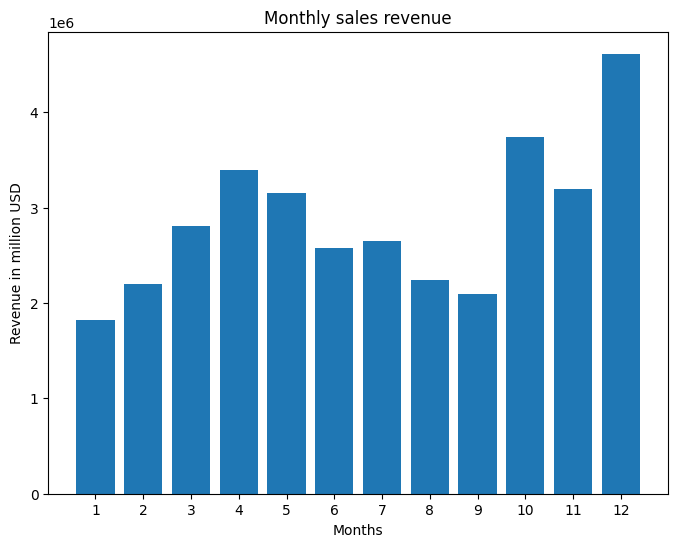

In [166]:
x = total_montly_sales.index
y = total_montly_sales.values

fig, ax = plt.subplots(figsize=(8,6))

ax.bar(x, y)
ax.set_ylabel('Revenue in million USD')
ax.set_xlabel('Months')
ax.set_xticks(range(1,13))
ax.set_title('Monthly sales revenue')

plt.show()

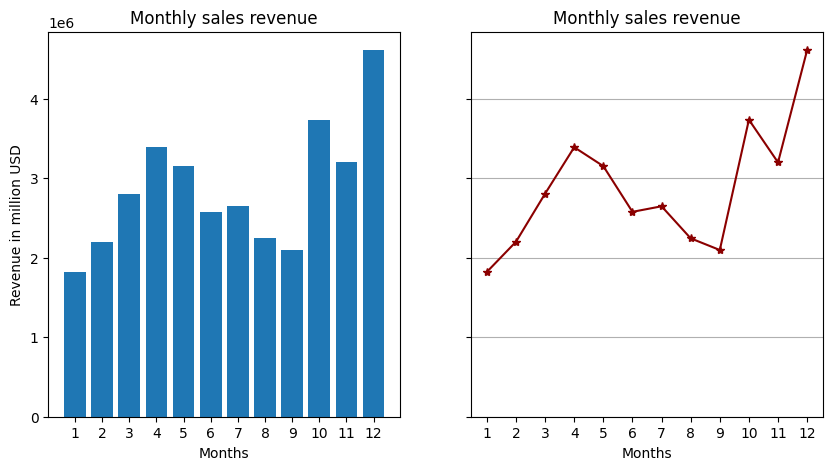

In [167]:
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)

ax1.bar(x, y)
ax1.set_ylabel('Revenue in million USD')
ax1.set_xlabel('Months')
ax1.set_xticks(range(1,13))
ax1.set_title('Monthly sales revenue')

ax2.plot(x, y, color='darkred', marker='*')
ax2.set_xlabel('Months')
ax2.set_xticks(range(1,13))
ax2.grid(visible=True, axis='y')
ax2.set_title('Monthly sales revenue')

plt.show()

### Task 2. What city ordered the largest quantity of products?

This time we will group orders based on the city. <br>
Recall that we have created Purchase City column out of the Purchase Address column

In [168]:
products_per_city = sales.groupby('Purchase_City')['Quantity_Ordered'].sum()

Sort the results in the decreasing order of the per-city ordered quantity

In [169]:
products_per_city.sort_values(ascending=False, inplace=True)

Finally, plot the per-city ordered quantites on a bar chart

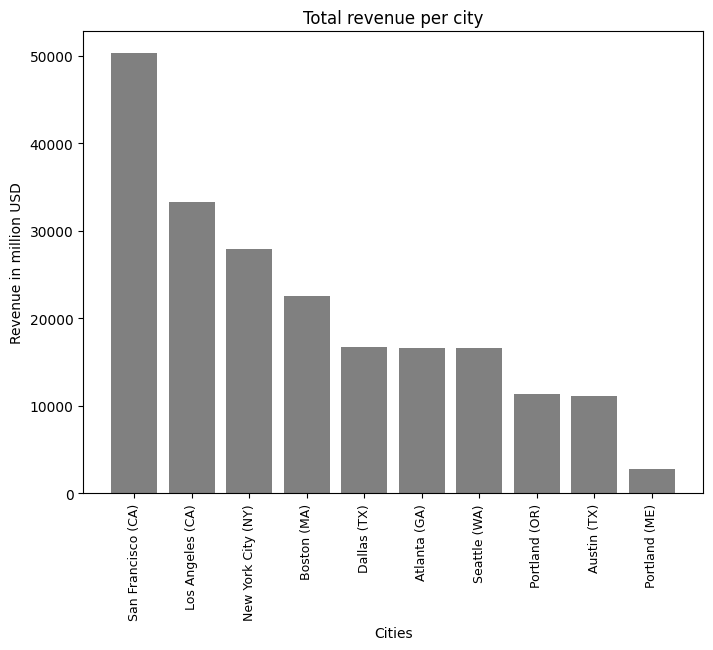

In [170]:
x = products_per_city.index
y = products_per_city.values

_, ax = plt.subplots(figsize=(8,6))

ax.bar(x, y, color='gray')
ax.set_title('Total revenue per city')
ax.tick_params(axis='x', labelrotation=90, labelsize=9)
ax.set_ylabel("Revenue in million USD")
ax.set_xlabel("Cities")

plt.show()

### Task 3. When, during a day, customers are likely to make most valuable orders?

To answer this one, we can extract the hour from the Order Date and examine the average total order price across the 24 hours of a day

**Step 1**: Create the 'Order Hour' column

In [171]:
sales['Order_Hour'] = sales.Order_Date.dt.hour

In [172]:
sales.loc[:,['Order_Date', 'Order_Hour']].sample(5)

,Order_Date,Order_Hour
315312,2019-10-20 16:57:00,16
35156,2019-04-06 17:57:00,17
10750,2019-12-05 22:26:00,22
364544,2019-06-15 20:20:00,20
296024,2019-11-26 19:14:00,19


**Step 2**: Group orders per Order Hour and compute mean Total price for each group

In [173]:
avg_price_per_hour = sales.groupby('Order_Hour')['Total_price'].mean()

Sort the results in the descending order of the mean total price

In [174]:
avg_price_per_hour.sort_values(ascending=False)

Order_Hour
1     196.113566
17    195.372200
15    190.815686
8     190.592866
4     190.469567
14    189.700722
2     188.939212
23    187.936963
9     187.360606
21    186.979293
19    186.977028
20    186.597664
7     185.702847
11    185.368644
12    184.064617
16    183.416921
0     182.537409
22    182.220495
18    180.728689
6     180.545125
13    177.705483
10    177.657782
3     175.400590
5     174.625148
Name: Total_price, dtype: float64

In [175]:
# added this overall average price to show how such a value can be plotted  
avg_tot_rev = sales.Total_price.mean()

Examine the results on a line chart

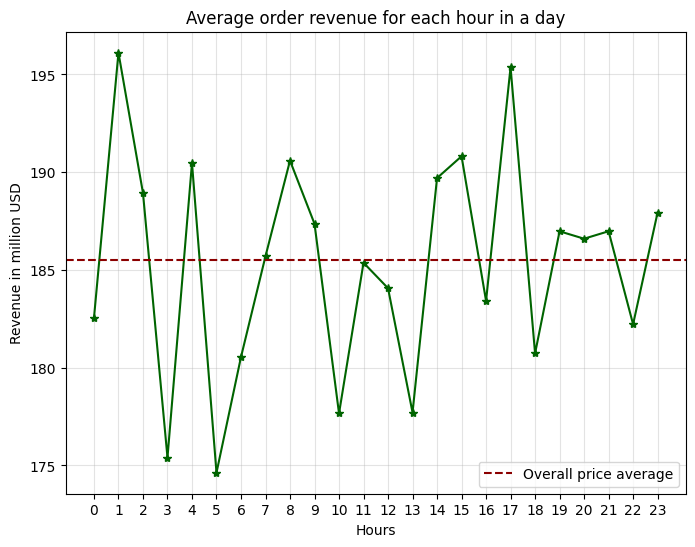

In [101]:
x = avg_price_per_hour.index
y = avg_price_per_hour.values

_, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, color='darkgreen', marker='*')
ax.set_title('Average order revenue for each hour in a day')
ax.set_xticks(range(24))
ax.set_ylabel("Revenue in million USD")
ax.set_xlabel("Hours")
ax.grid(visible=True, axis='both', alpha=0.35)

plt.axhline(y=avg_tot_rev, color='darkred', linestyle='--', label='Overall price average')
plt.legend(loc='lower right')

plt.show()

### Task 4. What product sold the most? What product contributed the most to the total revenue?

Let's first see how many different products there are and how frequently they were ordered

In [76]:
sales.Product.nunique()

19

In [77]:
sales.Product.value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

While the above series gives us the number of orders that a product appeared in, it does not tell us about the quantities that were ordered.

For each product, we need to take the overall quantity ordered and total price across all orders related to that product

In [78]:
sales_per_product = sales.groupby('Product')[['Quantity_Ordered', 'Total_price']].sum()

In [79]:
sales_per_product.head()

,Quantity_Ordered,Total_price
Product,,
20in Monitor,4129.0,454148.71
27in 4K Gaming Monitor,6244.0,2435097.56
27in FHD Monitor,7550.0,1132424.50
34in Ultrawide Monitor,6199.0,2355558.01
AA Batteries (4-pack),27635.0,106118.40


Get the products (top 5) that sold the most:

In [80]:
sales_per_product.sort_values(by="Quantity_Ordered", ascending=False).head(5)

,Quantity_Ordered,Total_price
Product,,
AAA Batteries (4-pack),31017.0,92740.83
AA Batteries (4-pack),27635.0,106118.40
USB-C Charging Cable,23975.0,286501.25
Lightning Charging Cable,23217.0,347094.15
Wired Headphones,20557.0,246478.43


Get the products (top 5) with the highest total revenue

In [81]:
sales_per_product.sort_values(by="Total_price", ascending=False).head(5)

,Quantity_Ordered,Total_price
Product,,
Macbook Pro Laptop,4728.0,8037600.00
iPhone,6849.0,4794300.00
ThinkPad Laptop,4130.0,4129958.70
Google Phone,5532.0,3319200.00
27in 4K Gaming Monitor,6244.0,2435097.56


We can also plot these data. <br>
In particular, we will create two horizontal bar plots, one next to the other, the first one showing total revenue per product, the second depicting the quantity of the product sold. We will sort the plots based on the total revenue, so that the products with the highest revenue are displayed towards the top of the plots.

For the guidance on how to create a horizontal bar chart, see [this example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html) from the Mathplotlib documentation.

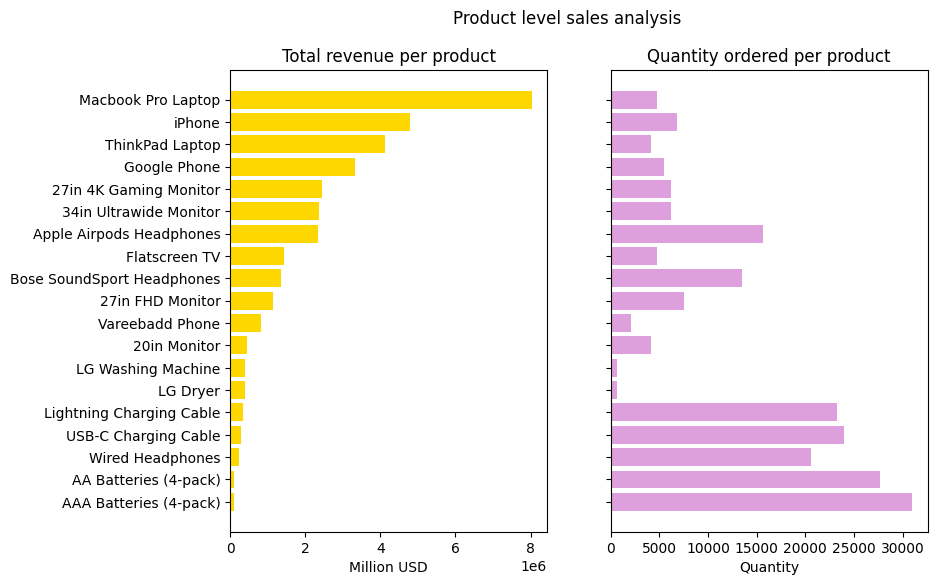

In [82]:
sales_per_product.sort_values(by='Total_price', ascending=False, inplace=True)

x = sales_per_product.index
y1 = sales_per_product.Total_price.values
y2 = sales_per_product.Quantity_Ordered.values

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9,6), sharey=True)

fig.suptitle("Product level sales analysis")

ax1.barh(x, y1, color='gold')
ax1.set_xlabel("Million USD")
ax1.set_title("Total revenue per product")
ax1.invert_yaxis()

ax2.barh(x, y2, color='plum')
ax2.set_xlabel("Quantity")
ax2.set_title("Quantity ordered per product")

plt.show()

We can also plot this data on a single line plot, using different scales for values shown on the y-axis.

[This example](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py) from the MatPlotLib documentation shows how have a plot with two different scales.

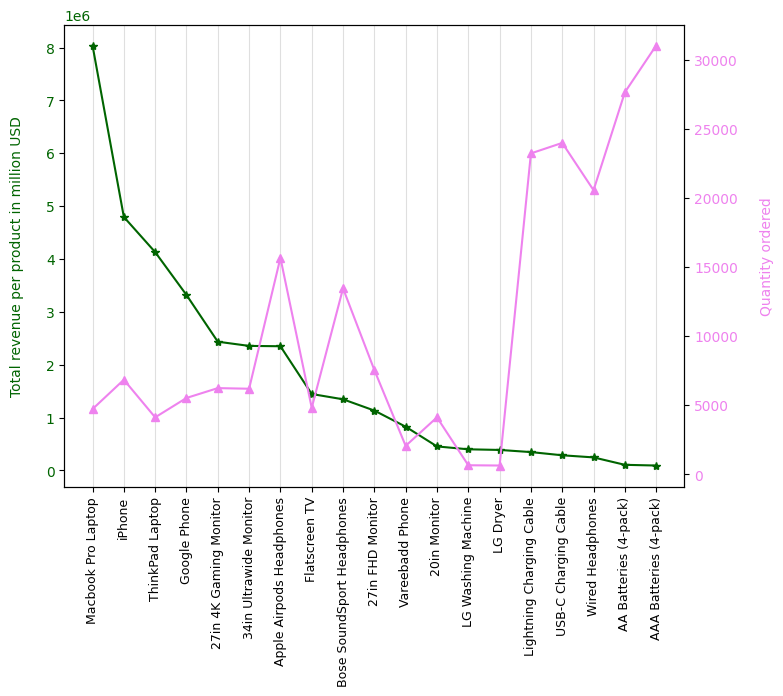

In [83]:
fig, ax1 = plt.subplots(figsize=(8,6))

colors = {'TR': 'darkgreen', 'Q': 'violet'}
ax1.plot(x, y1, color = colors['TR'], marker="*")
ax1.set_ylabel("Total revenue per product in million USD\n", color=colors['TR'])
ax1.tick_params(axis='y', labelcolor=colors['TR'])
ax1.tick_params(axis='x', labelrotation=90, labelsize=9)
ax1.grid(visible=True, axis='x', alpha=0.4)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis

ax2.plot(x, y2, color=colors['Q'], marker="^") # we've already handled the x-label with ax1
ax2.set_ylabel("\nQuantity ordered", color=colors['Q'])
ax2.tick_params(axis='y', labelcolor=colors['Q'])

plt.show()

### Task 5. Examine total revenue per product across cities

Note that we can group the data based on more than one attribute (column). <br> In this case, we will do the grouping based on the product and the city and compute total revenue for each product in each city:

In [84]:
tot_revenue_per_city_prod = sales.groupby(['Product', 'Purchase_City'])['Total_price'].sum()
tot_revenue_per_city_prod

Product       Purchase_City     
20in Monitor  Atlanta (GA)            37616.58
              Austin (TX)             25297.70
              Boston (MA)             43336.06
              Dallas (TX)             37726.57
              Los Angeles (CA)        72373.42
                                       ...    
iPhone        New York City (NY)     616700.00
              Portland (ME)           55300.00
              Portland (OR)          259700.00
              San Francisco (CA)    1162700.00
              Seattle (WA)           382200.00
Name: Total_price, Length: 190, dtype: float64

Note that we are getting a Series with two indexes - Product and Purchase City:

In [85]:
tot_revenue_per_city_prod.info()

<class 'pandas.core.series.Series'>
MultiIndex: 190 entries, ('20in Monitor', 'Atlanta (GA)') to ('iPhone', 'Seattle (WA)')
Series name: Total_price
Non-Null Count  Dtype  
--------------  -----  
190 non-null    float64
dtypes: float64(1)
memory usage: 2.7+ KB


We can transform this into a DataFrame by calling the `unstack()` method

In [86]:
tot_rev_city_prod_df = tot_revenue_per_city_prod.unstack()
tot_rev_city_prod_df

Purchase_City,Atlanta (GA),Austin (TX),Boston (MA),Dallas (TX),Los Angeles (CA),New York City (NY),Portland (ME),Portland (OR),San Francisco (CA),Seattle (WA)
Product,,,,,,,,,,
20in Monitor,37616.58,25297.70,43336.06,37726.57,72373.42,61594.40,6489.41,24087.81,109990.00,35636.76
27in 4K Gaming Monitor,192265.07,124016.82,263243.25,187585.19,391159.97,328371.58,33149.15,136106.51,569385.40,209814.62
27in FHD Monitor,88194.12,53996.40,119542.03,88044.13,183437.77,160789.28,17098.86,62395.84,272081.86,86844.21
34in Ultrawide Monitor,183155.18,124636.72,254973.29,194554.88,362890.45,329831.32,28879.24,124256.73,549465.54,202914.66
AA Batteries (4-pack),8421.12,5468.16,11581.44,8682.24,17041.92,13939.20,1493.76,5952.00,25171.20,8367.36
AAA Batteries (4-pack),7053.41,4987.32,10348.39,7486.96,14851.33,12330.76,1070.42,5148.78,22149.92,7313.54
Apple Airpods Headphones,189900.00,133050.00,247950.00,179100.00,370950.00,314700.00,34950.00,129900.00,559950.00,188700.00
Bose SoundSport Headphones,108389.16,70692.93,141585.84,106289.37,212478.75,179382.06,17998.20,70892.91,331666.83,106189.38
Flatscreen TV,122100.00,72600.00,166200.00,126000.00,218100.00,188400.00,18600.00,75000.00,346200.00,112500.00


In [87]:
tot_rev_city_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 20in Monitor to iPhone
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Atlanta (GA)        19 non-null     float64
 1   Austin (TX)         19 non-null     float64
 2   Boston (MA)         19 non-null     float64
 3   Dallas (TX)         19 non-null     float64
 4   Los Angeles (CA)    19 non-null     float64
 5   New York City (NY)  19 non-null     float64
 6   Portland (ME)       19 non-null     float64
 7   Portland (OR)       19 non-null     float64
 8   San Francisco (CA)  19 non-null     float64
 9   Seattle (WA)        19 non-null     float64
dtypes: float64(10)
memory usage: 1.6+ KB


In [88]:
tot_rev_city_prod_df.index

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

We can now plot this DataFrame using a heathmap. 
A handy guide for creating a heatmap is given in [this article](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py) from the Matplotlib documentation.

See [this page](https://matplotlib.org/stable/users/explain/colors/colormaps.html) of Matplotlib documentation for an overview of the predefined color maps.

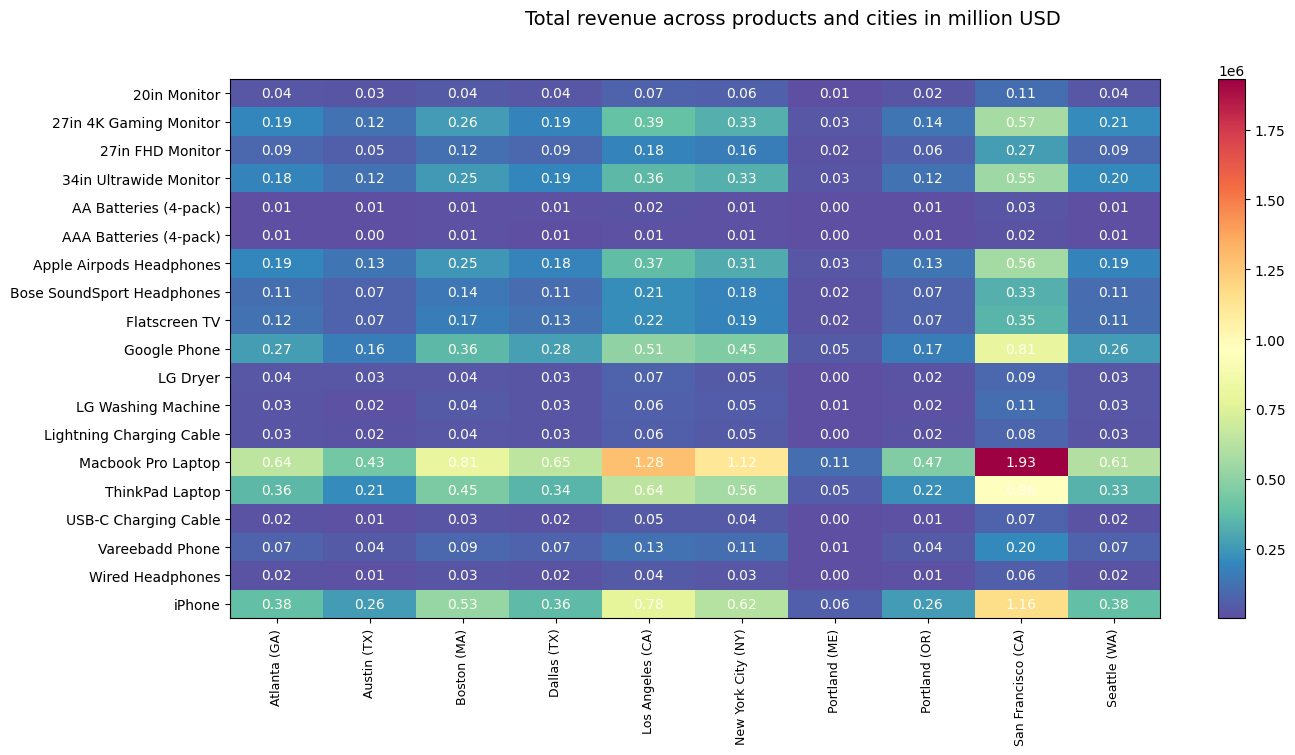

In [89]:
hm_data = tot_rev_city_prod_df.values
cities = tot_rev_city_prod_df.columns.tolist()
products = tot_rev_city_prod_df.index.tolist()

fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle("Total revenue across products and cities in million USD", fontsize=14)

hm = ax.imshow(hm_data, cmap='Spectral_r', aspect='auto')

ax.figure.colorbar(hm)

ax.set_xticks(range(len(cities)), labels=cities)
ax.tick_params(axis='x', labelrotation=90, labelsize=9)
ax.set_yticks(range(len(products)), labels=products)

for i in range(len(products)): # rows
    for j in range(len(cities)): # columns
        val = hm_data[i,j] / 1000000
        ax.text(j, i, f"{val:.2f}", va='center', ha='center', color='ivory')


plt.show()

In [90]:
hm_data

array([[3.7616580e+04, 2.5297700e+04, 4.3336060e+04, 3.7726570e+04,
        7.2373420e+04, 6.1594400e+04, 6.4894100e+03, 2.4087810e+04,
        1.0999000e+05, 3.5636760e+04],
       [1.9226507e+05, 1.2401682e+05, 2.6324325e+05, 1.8758519e+05,
        3.9115997e+05, 3.2837158e+05, 3.3149150e+04, 1.3610651e+05,
        5.6938540e+05, 2.0981462e+05],
       [8.8194120e+04, 5.3996400e+04, 1.1954203e+05, 8.8044130e+04,
        1.8343777e+05, 1.6078928e+05, 1.7098860e+04, 6.2395840e+04,
        2.7208186e+05, 8.6844210e+04],
       [1.8315518e+05, 1.2463672e+05, 2.5497329e+05, 1.9455488e+05,
        3.6289045e+05, 3.2983132e+05, 2.8879240e+04, 1.2425673e+05,
        5.4946554e+05, 2.0291466e+05],
       [8.4211200e+03, 5.4681600e+03, 1.1581440e+04, 8.6822400e+03,
        1.7041920e+04, 1.3939200e+04, 1.4937600e+03, 5.9520000e+03,
        2.5171200e+04, 8.3673600e+03],
       [7.0534100e+03, 4.9873200e+03, 1.0348390e+04, 7.4869600e+03,
        1.4851330e+04, 1.2330760e+04, 1.0704200e+03, 5.14

### Tasks to practice

1. Examine the distribution of total product purchases, in terms of total revenue, across the states. <br><br>
2. On which day, during a week, customers are likely to make most valuable orders?